# Analysis for the trend of time to pack for GH-1 2020

## Analysis Outline
1. Load the needed libraries 
2. Load the dataset into pandas
3. Get the dataset overview
4. Get the columns overview and decide the important columns you want to keep
5. Filter the data set to create a new dataset with only relevant columns
6. Get the overview of the new created dataset
7. Remove the data rows that have a null value on the package commited time
8. inspect the columns again if there is any null data to get rid off
9. convert the datetime columns into datetime objects
10. Write a function that will convert the date into a week number
11. Use the function above to create a new column with the week numbers
12. Calculate time it took to pick pack assign it to a new dataframe
13. Convert time it takes to pack into seconds
    - Use function
14. Create datasets that are product specific from the main dataset
    - Medical
    - Vacine
    - Blood
    

In [1]:
#importing the the libraries that will be very useful in our analysis
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt 
import numpy as np
import time 

In [2]:
#Loading data into the pandas
gh1_2020 =  pd.read_csv('summary_gh1_01012020.csv')

In [3]:
#get an overview of the data we have 
gh1_2020.head()

,Date (mm/dd/yyyy),Facility,Order received time,Order type,Pick/pack start time,Package ID,Package committed time,Zip Body,Call: Takeoff clearance,Flight ID,...,Fulfillment off-nominal event - 1,Fulfillment off-nominal event - 2,Flight off-nominal event - 1,Flight off-nominal event - 2,Flight off-nominal event - 3,Flight off-nominal event - 4,Downtime events - 1,Downtime events - 2,Comments,UTC Date
0,4/23/2020,NaN,NaN,NaN,NaN,16913,NaN,538,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Software > Software release,Weather > Wind at Nest,NaN,4/23/2020 14:20:22
1,4/29/2020,Anyinam HC (via Anyinam Health Centre),4/29/2020 16:18:28,Resupply - Medical,4/29/2020 16:20:58,17266,4/29/2020 16:24:19,538,NaN,18800,...,NaN,NaN,Swap Zip component due to exception,NaN,NaN,NaN,NaN,NaN,NaN,4/29/2020 16:18:28
2,4/29/2020,Ekye HC (via Ekye Health Centre),4/29/2020 13:06:09,Emergency - Medical,4/29/2020 13:15:29,16970,4/29/2020 13:19:14,566,NaN,18793,...,NaN,NaN,Wait for Zip to clear exceptions (use GPS spec...,NaN,NaN,NaN,NaN,NaN,NaN,4/29/2020 13:06:09
3,4/29/2020,Hawa Memorial HSP (via Hawa Memorial Hospital),4/29/2020 12:43:18,Resupply - Medical,4/29/2020 13:25:31,16976,4/29/2020 13:27:31,542,NaN,18790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/29/2020 12:43:18
4,4/29/2020,Sekyere CHPS,4/29/2020 11:10:00,Resupply - Vaccine,4/29/2020 11:28:51,17151,4/29/2020 11:30:18,198,NaN,18749,...,Fulfillment system issue,NaN,Wait for launcher to be free,Wait for Zip to clear exceptions (use GPS spec...,NaN,NaN,NaN,NaN,system wasn't allowing us to manage shipment,4/29/2020 11:10:00


### Observation 1:
- From the overview above we have to filter some columns and remain with the most relevant columns.
- Drop the first row as it has lots of NaN data

In [4]:
#lets view the columns and type of data they are having
gh1_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 25 columns):
Date (mm/dd/yyyy)                    2717 non-null object
Facility                             2634 non-null object
Order received time                  2634 non-null object
Order type                           2634 non-null object
Pick/pack start time                 2607 non-null object
Package ID                           2717 non-null object
Package committed time               2594 non-null object
Zip Body                             2717 non-null int64
Call: Takeoff clearance              0 non-null float64
Flight ID                            2702 non-null object
Flight launched time                 2588 non-null object
Delivery status                      2717 non-null object
Delivery time                        2504 non-null object
Recovery (or flight failure) time    2581 non-null object
Mission failure (if applicable)      91 non-null object
Fulfillment off-nominal even

### Observation 2:
- Keep
    - Date 
    - Facility
    - Order received time
    - Order type
    - Pick/pack start time
    - Package committed time
    - UTC Date

In [5]:
#filter the data set into the most relevant dataset
pickpack_time_data = gh1_2020[['Date (mm/dd/yyyy)','Facility','Order received time','Order type','Pick/pack start time','Package committed time']]

In [6]:
pickpack_time_data.head()

,Date (mm/dd/yyyy),Facility,Order received time,Order type,Pick/pack start time,Package committed time
0,4/23/2020,NaN,NaN,NaN,NaN,NaN
1,4/29/2020,Anyinam HC (via Anyinam Health Centre),4/29/2020 16:18:28,Resupply - Medical,4/29/2020 16:20:58,4/29/2020 16:24:19
2,4/29/2020,Ekye HC (via Ekye Health Centre),4/29/2020 13:06:09,Emergency - Medical,4/29/2020 13:15:29,4/29/2020 13:19:14
3,4/29/2020,Hawa Memorial HSP (via Hawa Memorial Hospital),4/29/2020 12:43:18,Resupply - Medical,4/29/2020 13:25:31,4/29/2020 13:27:31
4,4/29/2020,Sekyere CHPS,4/29/2020 11:10:00,Resupply - Vaccine,4/29/2020 11:28:51,4/29/2020 11:30:18


In [7]:
#get the overview of the new dataset
pickpack_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 6 columns):
Date (mm/dd/yyyy)         2717 non-null object
Facility                  2634 non-null object
Order received time       2634 non-null object
Order type                2634 non-null object
Pick/pack start time      2607 non-null object
Package committed time    2594 non-null object
dtypes: object(6)
memory usage: 127.5+ KB


### Observation 3:
- Still need to remove some few more rows that do not have commited time


In [8]:
pickpack_time_data = pickpack_time_data[pickpack_time_data['Package committed time'].notna()]
pickpack_time_data = pickpack_time_data[pickpack_time_data['Pick/pack start time'].notna()]
pickpack_time_data = pickpack_time_data[pickpack_time_data['Order type'].notna()]
pickpack_time_data = pickpack_time_data[pickpack_time_data['Order received time'].notna()]
pickpack_time_data = pickpack_time_data[pickpack_time_data['Facility'].notna()]


In [9]:
pickpack_time_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2592 entries, 1 to 2716
Data columns (total 6 columns):
Date (mm/dd/yyyy)         2592 non-null object
Facility                  2592 non-null object
Order received time       2592 non-null object
Order type                2592 non-null object
Pick/pack start time      2592 non-null object
Package committed time    2592 non-null object
dtypes: object(6)
memory usage: 141.8+ KB


In [10]:
pickpack_time_data['Order received time'] = pd.to_datetime(pickpack_time_data['Order received time'])
pickpack_time_data['Pick/pack start time'] = pd.to_datetime(pickpack_time_data['Pick/pack start time'])
pickpack_time_data['Package committed time'] = pd.to_datetime(pickpack_time_data['Package committed time'])
pickpack_time_data['Date (mm/dd/yyyy)'] = pd.to_datetime(pickpack_time_data['Date (mm/dd/yyyy)'])

In [11]:
test = pickpack_time_data['Date (mm/dd/yyyy)']

for item in test:
    week = item.isocalendar()
    print(week[1], item)

18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-29 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-28 00:00:00
18 2020-04-

10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-04 00:00:00
10 2020-03-03 00:00:00
10 2020-03-03 00:00:00
10 2020-03-03 00:00:00
10 2020-03-03 00:00:00
10 2020-03-03 00:00:00
10 2020-03-03 00:00:00
10 2020-03-

6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
6 2020-02-03 00:00:00
5 2020-02-02 00:00:00
5 2020-02-02 00:00:00
5 2020-02-02 00:00:00
5 2020-02-02 00:00:00
5 2020-02-02 00:00:00
5 2020-02-02 00:00:00
5 2020-02-02 00:00:00
5 2020-02-01 00:00:00
5 2020-02-01 00:00:00
5 2020-02-01 00:00:00
5 2020-02-01 00:00:00
5 2020-01-31 00:00:00
5 2020-01-31 00:00:00
5 2020-01-31 00:00:00
5 2020-01-31 00:00:00
5 2020-01-31 00:00:00
5 2020-01-31 00:00:00
5 2020-01-31 00:00:00
5 2020-01-31 00:00:00
5 2020-01-31 00:00:00
5 2020-01-30 00:00:00
5 2020-01-30 00:00:00
5 2020-01-30 00:00:00
5 2020-01-30 00:00:00
5 2020-01-30 00:00:00
5 2020-01-30 00:00:00
5 2020-01-30 00:00:00
5 2020-01-30 00:00:00
5 2020-01-

In [96]:
#define the function, takes the dataset you want to convert
    #initiate an empty list inside
    #using the for loop go through the all the items in dataset:
        #for each dataset extract the week number and assign it to a variable
        #append the week value to the list created above
    #return the week number
    
def week_number_extractor(dataset):
    week_no = []
    for item in dataset:
        week = item.isocalendar()
        week = week[1]
        week_no.append(week)
    return week_no

In [97]:
weeks = week_number_extractor(pickpack_time_data['Date (mm/dd/yyyy)'])
pickpack_time_data['Week Number'] = weeks

In [15]:
pickpack_time_data

,Date (mm/dd/yyyy),Facility,Order received time,Order type,Pick/pack start time,Package committed time,Week Number
1,2020-04-29,Anyinam HC (via Anyinam Health Centre),2020-04-29 16:18:28,Resupply - Medical,2020-04-29 16:20:58,2020-04-29 16:24:19,18
2,2020-04-29,Ekye HC (via Ekye Health Centre),2020-04-29 13:06:09,Emergency - Medical,2020-04-29 13:15:29,2020-04-29 13:19:14,18
3,2020-04-29,Hawa Memorial HSP (via Hawa Memorial Hospital),2020-04-29 12:43:18,Resupply - Medical,2020-04-29 13:25:31,2020-04-29 13:27:31,18
4,2020-04-29,Sekyere CHPS,2020-04-29 11:10:00,Resupply - Vaccine,2020-04-29 11:28:51,2020-04-29 11:30:18,18
5,2020-04-29,Sekyere CHPS,2020-04-29 11:10:00,Resupply - Vaccine,2020-04-29 11:25:44,2020-04-29 11:28:27,18
...,...,...,...,...,...,...,...
2712,2019-11-28,Enyiresi Hospital,2019-11-28 16:30:05,Emergency - Blood,2019-12-31 16:33:45,2019-12-31 16:37:09,48
2713,2019-11-27,Awenare Health Centre,2019-11-27 14:07:36,Resupply - Medical,2020-01-18 12:33:13,2020-01-18 12:36:09,48
2714,2019-11-27,Awenare Health Centre,2019-11-27 14:07:36,Resupply - Medical,2020-01-18 12:33:13,2020-01-18 12:36:09,48
2715,2019-11-27,Awenare Health Centre,2019-11-27 14:07:36,Resupply - Medical,2019-11-27 14:09:36,2019-11-27 14:13:31,48


In [16]:
pickpack_time_data['Time Taken'] = pickpack_time_data['Package committed time'] - pickpack_time_data['Pick/pack start time']

In [17]:
for item in pickpack_time_data['Time Taken']:
    print(item.total_seconds())


201.0
225.0
120.0
87.0
163.0
255.0
892.0
158.0
265.0
271.0
237.0
213.0
211.0
133.0
123.0
3765.0
4629.0
378.0
201.0
281.0
832.0
832.0
161.0
161.0
404.0
404.0
429.0
429.0
182.0
498.0
17.0
215.0
308.0
183.0
252.0
358.0
3096.0
1554.0
183.0
102.0
159.0
149.0
197.0
214.0
306.0
233.0
229.0
184.0
542.0
259.0
291.0
234.0
128.0
201.0
148.0
136.0
140.0
61.0
156.0
199.0
127.0
189.0
189.0
6588.0
187.0
198.0
363.0
259.0
207.0
129.0
467.0
853.0
416.0
159.0
140.0
122.0
5410.0
164.0
233.0
140.0
298.0
248.0
167.0
230.0
139.0
164.0
1534.0
174.0
169.0
94.0
161.0
401.0
191.0
191.0
306.0
163.0
501.0
233.0
654.0
281.0
230.0
286.0
93.0
181.0
82.0
256.0
85.0
237.0
184.0
153.0
262.0
147.0
194.0
477.0
66.0
113.0
122.0
41.0
61.0
144.0
159.0
172.0
489.0
290.0
290.0
218.0
275.0
115.0
1657.0
117.0
110.0
128.0
87.0
443.0
347.0
227.0
1569.0
74.0
199.0
245.0
260.0
111.0
555.0
247.0
245.0
228.0
6511.0
127.0
405.0
216.0
625.0
3149.0
183.0
92.0
70.0
187.0
165.0
166.0
370.0
172.0
203.0
136.0
217.0
189.0
540.0
192.0
220.0
2

302.0
159.0
163.0
141.0
191.0
291.0
263.0
181.0
129.0
146.0
16.0
0.0
204.0
324.0
292.0
218.0
154.0
191.0
171.0
213.0
155.0
8.0
185.0
10.0
10.0
723.0
341.0
13.0
13.0
178.0
125.0
280.0
216.0
192.0
191.0
123.0
103.0
-46586.0
351.0
45.0
99.0
215.0
139.0
138.0
126.0
157.0
132.0
118.0
164.0
176.0
168.0
151.0
158.0
257.0
102.0
254.0
209.0
61.0
195.0
250.0
42.0
181.0
259.0
129.0
889.0
205.0
68.0
288.0
309.0
57.0
116.0
68.0
92.0
36.0
32.0
187.0
6.0
71.0
3348.0
99.0
1161.0
289.0
349.0
157.0
126.0
108.0
144.0
177.0
162.0
115.0
221.0
135.0
179.0
127.0
125.0
135.0
129.0
129.0
133.0
155.0
109.0
184.0
110.0
162.0
273.0
148.0
282.0
196.0
257.0
184.0
-236.0
142.0
144.0
162.0
72.0
72.0
356.0
360.0
262.0
252.0
28.0
188.0
194.0
378.0
565.0
390.0
326.0
173.0
255.0
194.0
211.0
555.0
182.0
164.0
220.0
186.0
60.0
60.0
193.0
193.0
306.0
213.0
151.0
163.0
183.0
172.0
199.0
53.0
229.0
106.0
126.0
349.0
149.0
244.0
140.0
193.0
119.0
140.0
142.0
156.0
171.0
155.0
340.0
163.0
171.0
244.0
348.0
69.0
334.0
403.0
264.

In [18]:
#define a function that takes datetime object
    #create an empty list
         #for item in the dataset:
            #convert time into seconds 
            #append the seconds into empyt list
    #return Return the list of time in seconds

def time_to_seconds(dataset):
    seconds = []
    for item in dataset:
        time = item.total_seconds()
        seconds.append(time)
    return seconds
        
    

In [19]:
time_Seconds = time_to_seconds(pickpack_time_data['Time Taken'])
pickpack_time_data['Time Taken'] = time_Seconds

In [20]:
pickpack_time_data['Order type'].unique()

array(['Resupply - Medical', 'Emergency - Medical', 'Resupply - Vaccine',
       'Emergency - Sample', 'Resupply - Blood', 'Emergency - Vaccine',
       'Emergency - Blood'], dtype=object)

In [105]:
pickpack_time_data.drop(pickpack_time_data[pickpack_time_data['Time Taken'] > 800 ].index, inplace=True)
pickpack_time_data.drop(pickpack_time_data[pickpack_time_data['Time Taken'] < 0 ].index, inplace=True)
#df = df.drop(df[<some boolean condition>].index)

In [106]:
pickpack_time_data[pickpack_time_data['Order type'] == 0 ]

,Date (mm/dd/yyyy),Facility,Order received time,Order type,Pick/pack start time,Package committed time,Week Number,Time Taken


In [107]:
medical_pickpack = pickpack_time_data[(pickpack_time_data['Order type'] == 'Resupply - Medical')|(pickpack_time_data['Order type'] == 'Emergency - Medical') ]
vacine_pickpack = pickpack_time_data[(pickpack_time_data['Order type'] == 'Resupply - Vaccine')|(pickpack_time_data['Order type'] == 'Emergency - Vaccine') ]
sample_pickpack = pickpack_time_data[(pickpack_time_data['Order type'] == 'Emergency - Sample')]
blood_pickpack  = pickpack_time_data[(pickpack_time_data['Order type'] == 'Resupply - Blood')|(pickpack_time_data['Order type'] == 'Emergency - Blood') ]

In [108]:
vacine_pickpack

,Date (mm/dd/yyyy),Facility,Order received time,Order type,Pick/pack start time,Package committed time,Week Number,Time Taken
4,2020-04-29,Sekyere CHPS,2020-04-29 11:10:00,Resupply - Vaccine,2020-04-29 11:28:51,2020-04-29 11:30:18,18,87.0
5,2020-04-29,Sekyere CHPS,2020-04-29 11:10:00,Resupply - Vaccine,2020-04-29 11:25:44,2020-04-29 11:28:27,18,163.0
15,2020-04-29,Awenade CHPS,2020-04-29 08:19:22,Resupply - Vaccine,2020-04-29 08:29:08,2020-04-29 08:31:11,18,123.0
23,2020-04-28,Anyinasin CHPS,2020-04-28 14:40:50,Resupply - Vaccine,2020-04-28 15:14:22,2020-04-28 15:17:03,18,161.0
24,2020-04-28,Anyinasin CHPS,2020-04-28 14:40:50,Resupply - Vaccine,2020-04-28 15:14:22,2020-04-28 15:17:03,18,161.0
...,...,...,...,...,...,...,...,...
710,2020-03-31,Asitey HC,2020-03-31 11:26:36,Resupply - Vaccine,2020-03-31 11:51:39,2020-03-31 11:57:41,14,362.0
714,2020-03-31,Oborpa HC,2020-03-31 11:06:29,Resupply - Vaccine,2020-03-31 11:53:54,2020-03-31 11:57:46,14,232.0
725,2020-03-31,Nyamekrom CHPS,2020-03-31 10:30:19,Resupply - Vaccine,2020-03-31 10:35:17,2020-03-31 10:44:41,14,564.0
726,2020-03-31,Suhyen CHPS,2020-03-31 10:23:21,Resupply - Vaccine,2020-03-31 10:24:06,2020-03-31 10:33:27,14,561.0


In [109]:
medical_daily_median = medical_pickpack.groupby('Date (mm/dd/yyyy)', as_index=True).agg({'Time Taken': "median"}).reset_index()
vacine_daily_median = vacine_pickpack.groupby('Date (mm/dd/yyyy)', as_index=True).agg({'Time Taken':'median'}).reset_index()
sample_daily_median = sample_pickpack.groupby('Date (mm/dd/yyyy)', as_index=True).agg({'Time Taken':'median'}).reset_index()
blood_daily_median = blood_pickpack.groupby('Date (mm/dd/yyyy)', as_index=True).agg({'Time Taken':'median'}).reset_index()

In [110]:
blood_daily_median

,Date (mm/dd/yyyy),Time Taken
0,2019-11-28,159.0
1,2019-11-29,138.5
2,2019-11-30,204.0
3,2020-01-01,182.5
4,2020-01-02,275.0
...,...,...
57,2020-04-18,90.0
58,2020-04-24,115.0
59,2020-04-25,367.0
60,2020-04-26,306.0


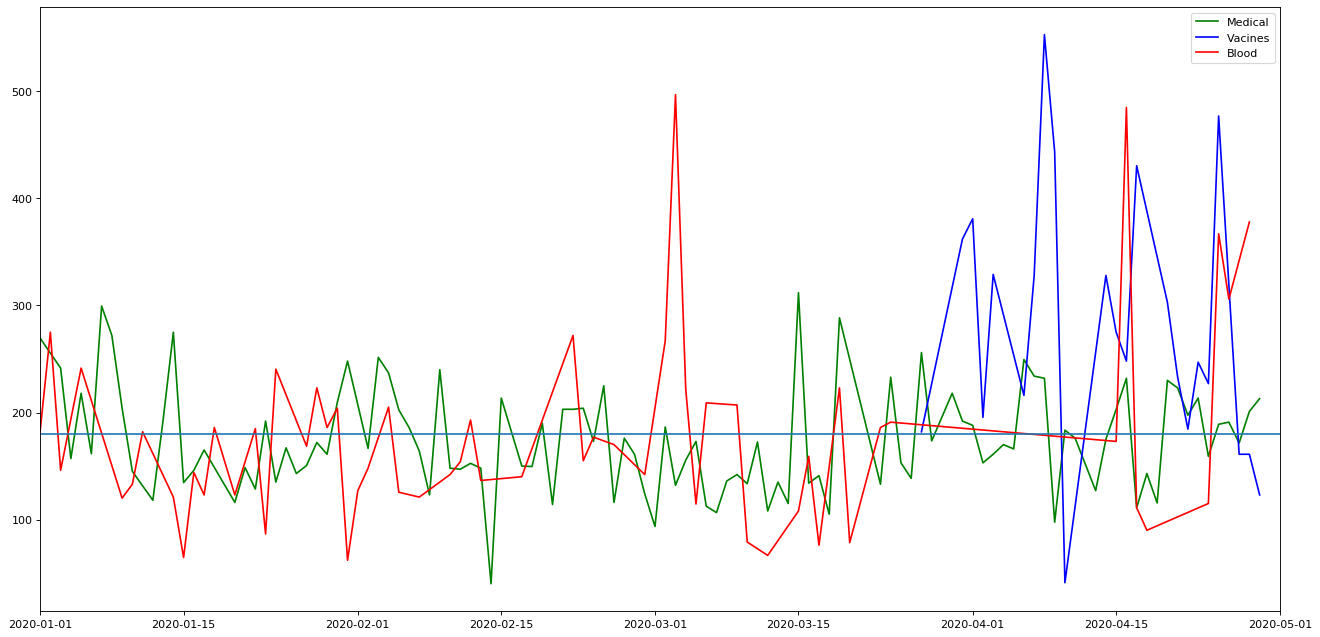

In [111]:
plt.figure(figsize=(20, 10), dpi=80)
plt.plot(medical_daily_median['Date (mm/dd/yyyy)'], medical_daily_median['Time Taken'], color = 'g',label = 'Medical')
plt.plot(vacine_daily_median['Date (mm/dd/yyyy)'], vacine_daily_median['Time Taken'], color = 'b', label = 'Vacines')
#plt.plot(sample_daily_median['Date (mm/dd/yyyy)'], sample_daily_median['Time Taken'], color = 'y')
plt.plot(blood_daily_median['Date (mm/dd/yyyy)'], blood_daily_median['Time Taken'], color = 'r', label = "Blood")
plt.xlim('2020-01','2020-05')
plt.axhline(y=180)
plt.legend()
plt.show()

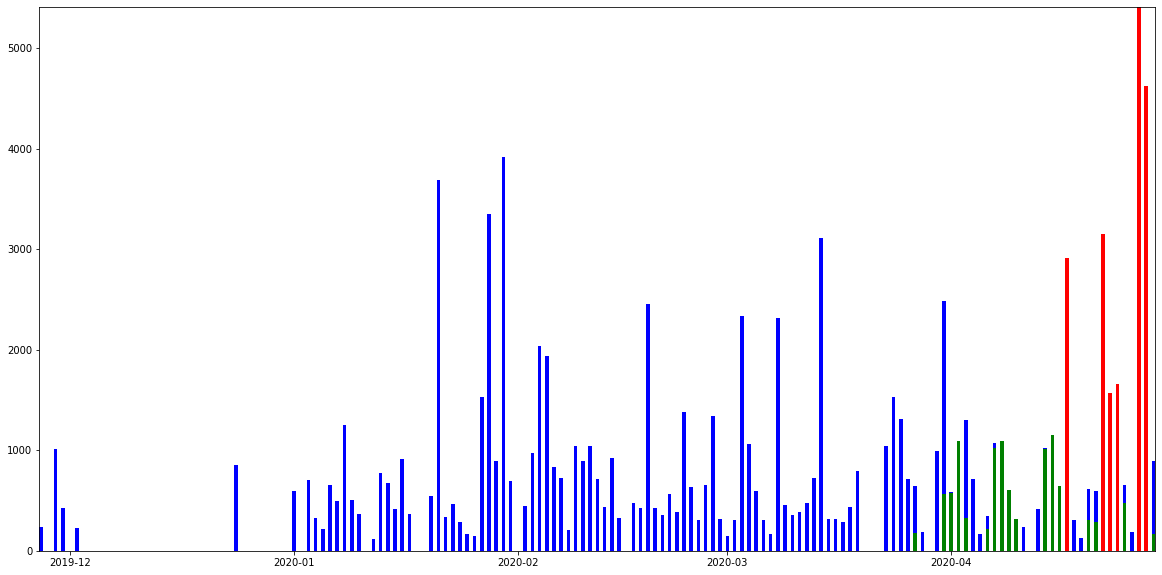

In [98]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
w = 0.5
ax.bar(medical_pickpack['Date (mm/dd/yyyy)'],medical_pickpack['Time Taken'], width=w, color='b', align='center')
ax.bar(vacine_pickpack['Date (mm/dd/yyyy)'],vacine_pickpack['Time Taken'], width=w, color='g', align='center')
ax.bar(sample_pickpack['Date (mm/dd/yyyy)'],sample_pickpack['Time Taken'], width=w, color='r', align='center')
ax.xaxis_date()
ax.autoscale(tight=True)

plt.show()